<a href="https://colab.research.google.com/github/YueHsinLee/Option-Implied-Volatility-Spread-and-Skew/blob/main/Volatility_Smirk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
import warnings
warnings.filterwarnings("ignore")

# Volatility Smirk:

Option Data from OptionMetrics, Stock Price Data from CRSP.

Date: 2021/01/01~2021/12/31

### Option Filters:

    time to maturity: 10~60
    OI > 0
    IV: 0.03 ~ 2.00
    Volume: Non Missing
    Option Price = mean(bid, ask) > $0.025
    
### Stock Price Filters:

    Volume > 0
    Stock Price > $5

## Download Data From Google Cloud

In [ ]:
option_url = 'https://drive.google.com/file/d/1afTmhpB5fdrAgCSzTSjCRM8Cm8Qjo7Go/view?usp=share_link'
option_output = 'option data for vol smirk.csv'
gdown.download(url = option_url, output = option_output, quiet=False, fuzzy=True)

stock_url = 'https://drive.google.com/file/d/1G7yrXHiMdRr_wyY1vkGFXVQ-JDv5ly_v/view?usp=share_link'
stock_output = 'stock data.csv'
gdown.download(url = stock_url, output = stock_output, quiet=False, fuzzy=True)

rvol_url = 'https://drive.google.com/file/d/1K77tA_Bx8K_ve8iIJ3WZh8EWCyx2S8Re/view?usp=share_link'
rvol_output = 'stock data for RVol.csv'
gdown.download(url = rvol_url, output = rvol_output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1afTmhpB5fdrAgCSzTSjCRM8Cm8Qjo7Go
To: /Users/leeyuihsin/論文/選擇權資訊整理/option data for vol smirk.csv
100%|██████████| 270M/270M [00:59<00:00, 4.54MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1G7yrXHiMdRr_wyY1vkGFXVQ-JDv5ly_v
To: /Users/leeyuihsin/論文/選擇權資訊整理/stock data.csv
100%|██████████| 586k/586k [00:00<00:00, 2.93MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K77tA_Bx8K_ve8iIJ3WZh8EWCyx2S8Re
To: /Users/leeyuihsin/論文/選擇權資訊整理/stock data for RVol.csv
100%|██████████| 757k/757k [00:00<00:00, 3.21MB/s]


'stock data for RVol.csv'

In [ ]:
option = pd.read_csv('option data for vol smirk.csv')

option['price'] = 0.5*(option['best_bid'] + option['best_offer'])
option = option[option['price']>=0.125]
option['strike'] = option['strike_price']/1000
option = option[['date', 'exdate', 'ticker', 'cp_flag', 'strike', 'impl_volatility']]

option

,date,exdate,ticker,cp_flag,strike,impl_volatility
0,2015-01-02,2015-01-17,XLB,C,34.0,0.880635
1,2015-01-02,2015-01-17,XLB,C,35.0,0.817739
2,2015-01-02,2015-01-17,XLB,C,38.0,0.571175
3,2015-01-02,2015-01-17,XLB,C,44.0,0.262111
4,2015-01-02,2015-01-17,XLB,C,45.0,0.318640
...,...,...,...,...,...,...
3003340,2021-12-31,2022-02-18,XLC,P,77.0,0.169753
3003341,2021-12-31,2022-02-18,XLC,P,78.0,0.161513
3003342,2021-12-31,2022-02-18,XLC,P,79.0,0.154420
3003343,2021-12-31,2022-02-18,XLC,P,81.0,0.144884


In [ ]:
stock = pd.read_csv('stock data.csv')
stock.rename(columns = {'DlyCalDt' : 'date', 'Ticker' : 'ticker', 'DlyPrc' : 'price'}, inplace = True)
stock = stock[['date', 'ticker', 'price']]
stock

,date,ticker,price
0,2015-01-02,XLB,48.65
1,2015-01-05,XLB,47.41
2,2015-01-06,XLB,46.99
3,2015-01-07,XLB,47.52
4,2015-01-08,XLB,48.65
...,...,...,...
16561,2021-12-27,XLY,205.17
16562,2021-12-28,XLY,205.26
16563,2021-12-29,XLY,205.67
16564,2021-12-30,XLY,204.93


## Merge Data and Calculate Moneyness

In [ ]:
df = pd.merge(option, stock, on = ['date', 'ticker'])
df.dropna(inplace = True)
df['moneyness'] = df['strike']/df['price']
df

,date,exdate,ticker,cp_flag,strike,impl_volatility,price,moneyness
0,2015-01-02,2015-01-17,XLB,C,34.0,0.880635,48.65,0.698869
1,2015-01-02,2015-01-17,XLB,C,35.0,0.817739,48.65,0.719424
2,2015-01-02,2015-01-17,XLB,C,38.0,0.571175,48.65,0.781089
3,2015-01-02,2015-01-17,XLB,C,44.0,0.262111,48.65,0.904419
4,2015-01-02,2015-01-17,XLB,C,45.0,0.318640,48.65,0.924974
...,...,...,...,...,...,...,...,...
2178644,2021-12-31,2022-02-18,XLC,P,77.0,0.169753,77.68,0.991246
2178645,2021-12-31,2022-02-18,XLC,P,78.0,0.161513,77.68,1.004119
2178646,2021-12-31,2022-02-18,XLC,P,79.0,0.154420,77.68,1.016993
2178647,2021-12-31,2022-02-18,XLC,P,81.0,0.144884,77.68,1.042739


# ATM Call IV:

### 計算 moneyness 最接近1的履約價，並以該履約價中的各到期日買權隱含波動度取平均

In [ ]:
CallIVmean = df[df['cp_flag'] == 'C'].groupby(['date', 'ticker', 'moneyness']).agg({'impl_volatility': 'mean'}).reset_index(level = ['ticker', 'moneyness'])
CallIVmean = CallIVmean.reset_index()
CallIVmean = CallIVmean.groupby(['date', 'ticker']).apply(lambda x: x.iloc[(abs(x['moneyness'] - 1)).argsort()[:1]]).reset_index(level =['date', 'ticker'], drop = True).reset_index(drop = True)
CallIVmean = CallIVmean[['date', 'ticker', 'impl_volatility']]
CallIVmean.rename(columns = {'impl_volatility':'ATMC_IV'}, inplace = True)
CallIVmean

,date,ticker,ATMC_IV
0,2015-01-02,XLB,0.185951
1,2015-01-02,XLE,0.273491
2,2015-01-02,XLF,0.163023
3,2015-01-02,XLI,0.167253
4,2015-01-02,XLK,0.154340
...,...,...,...
16370,2021-12-31,XLK,0.193551
16371,2021-12-31,XLP,0.116787
16372,2021-12-31,XLRE,0.152987
16373,2021-12-31,XLU,0.134590


# OTM Put IV:

### 首先取得 moneyness 小於0.95的 Put，再取 moneyness 最大的履約價，
### 在該履約價中的所有天期賣權計算IV平均

In [ ]:
PutIVmean = df[df['cp_flag'] == 'P'].groupby(['date', 'ticker', 'moneyness']).agg({'impl_volatility': 'mean'}).reset_index(level = ['ticker', 'moneyness'])
PutIVmean = PutIVmean.reset_index()
PutIVmean = PutIVmean[PutIVmean['moneyness']<0.95]
PutIVmean = PutIVmean.groupby(['date', 'ticker']).apply(lambda x: x.iloc[(x['moneyness'].argsort()[-1:])]).reset_index(level =['date', 'ticker'], drop = True).reset_index(drop = True)
PutIVmean = PutIVmean[['date', 'ticker', 'impl_volatility']]
PutIVmean.rename(columns = {'impl_volatility':'OTMP_IV'}, inplace = True)
PutIVmean

,date,ticker,OTMP_IV
0,2015-01-02,XLB,0.229852
1,2015-01-02,XLE,0.321238
2,2015-01-02,XLF,0.210398
3,2015-01-02,XLI,0.254910
4,2015-01-02,XLK,0.242225
...,...,...,...
15706,2021-12-31,XLK,0.232681
15707,2021-12-31,XLP,0.182445
15708,2021-12-31,XLRE,0.199524
15709,2021-12-31,XLU,0.177366


## Trading Strategy Backtest

In [ ]:
IV = pd.merge(CallIVmean, PutIVmean, on = ['date', 'ticker'])
IV['skew'] = IV['OTMP_IV'] - IV['ATMC_IV']

merged = pd.merge(IV, stock, on = ['date', 'ticker'])
merged.dropna(inplace = True)
merged['date'] = pd.to_datetime(merged['date'], format='%Y-%m-%d')
merged

,date,ticker,ATMC_IV,OTMP_IV,skew,price
0,2015-01-02,XLB,0.185951,0.229852,0.043901,48.65
1,2015-01-02,XLE,0.273491,0.321238,0.047747,79.53
2,2015-01-02,XLF,0.163023,0.210398,0.047375,24.73
3,2015-01-02,XLI,0.167253,0.254910,0.087657,56.51
4,2015-01-02,XLK,0.154340,0.242225,0.087884,41.27
...,...,...,...,...,...,...
15702,2021-12-31,XLK,0.193551,0.232681,0.039130,173.87
15703,2021-12-31,XLP,0.116787,0.182445,0.065659,77.11
15704,2021-12-31,XLRE,0.152987,0.199524,0.046537,51.81
15705,2021-12-31,XLU,0.134590,0.177366,0.042776,71.58


In [ ]:
ret = pd.read_csv('stock data for RVol.csv')[['DlyCalDt', 'Ticker', 'DlyRet']]
ret.rename(columns = {'DlyCalDt':'date', 'Ticker':'ticker', 'DlyRet':'ret'}, inplace = True)
ret['date'] = pd.to_datetime(ret['date'], format='%Y-%m-%d')
bt = pd.merge(merged, ret, on = ['date', 'ticker'], how = 'inner')

bt['year_month'] = bt['date'].dt.to_period('M')
bt = bt[['date', 'year_month', 'ticker', 'skew', 'ret']].sort_values(['ticker', 'date'])
bt['skew_avg'] =bt.groupby(['year_month', 'ticker'])['skew'].transform('mean')

skewavg = bt[['year_month', 'ticker', 'skew_avg']].drop_duplicates(['ticker', 'year_month'])
skewavg['prev_skew_avg'] = skewavg.groupby(['ticker'])['skew_avg'].shift()
skewavg = skewavg[['year_month', 'ticker', 'prev_skew_avg']]

skewavg.dropna(inplace = True)
skewavg.sort_values(['year_month', 'prev_skew_avg'], inplace=True)

# 根据 year_month 对每个 ticker 的 prev_skew_avg 进行排名
skewavg['rank'] = skewavg.groupby('year_month')['prev_skew_avg'].rank()

# 创建新的 position 列并初始化为 0
skewavg['position'] = 0

# 遍历每个月份
for month in skewavg['year_month'].unique():
    # 获取当前月份的数据
    month_data = skewavg[skewavg['year_month'] == month]

    # 将排名为前三名(最低)的 ticker 的 position 设为 1
    skewavg.loc[(skewavg['year_month'] == month) & (skewavg['rank'] <= 3), 'position'] = 1

    # 将排名为最后三名(最高)的 ticker 的 position 设为 -1
    skewavg.loc[(skewavg['year_month'] == month) & (skewavg['rank'] > len(month_data) - 3), 'position'] = -1

bt = pd.merge(bt, skewavg, on = ['year_month', 'ticker'])

bt.dropna(inplace = True)
bt = bt[['date', 'ticker', 'prev_skew_avg','rank', 'position', 'ret']].sort_values(['date', 'rank']).reset_index(drop = True)
bt

,date,ticker,prev_skew_avg,rank,position,ret
0,2015-02-02,XLE,0.036882,1.0,1,0.030576
1,2015-02-02,XLU,0.043442,2.0,1,0.004346
2,2015-02-02,XLP,0.045739,3.0,1,0.011870
3,2015-02-02,XLY,0.047228,4.0,0,0.009001
4,2015-02-02,XLK,0.050263,5.0,0,0.010276
...,...,...,...,...,...,...
15527,2021-12-31,XLB,0.045526,6.0,0,0.004434
15528,2021-12-31,XLC,0.046417,7.0,0,-0.013838
15529,2021-12-31,XLI,0.046516,8.0,-1,0.004271
15530,2021-12-31,XLK,0.046834,9.0,-1,-0.004865


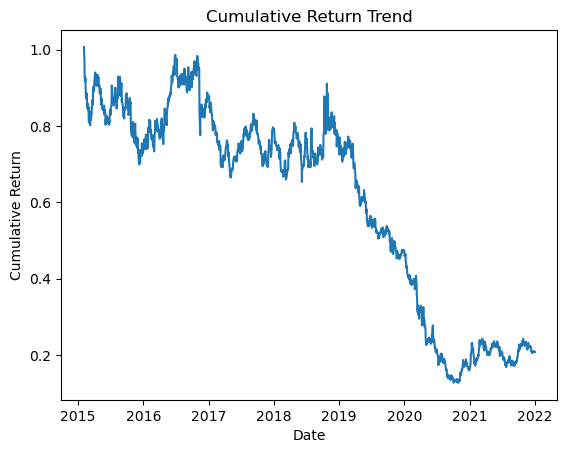

In [ ]:
grouped = bt.groupby('date')
trade = []
for date, group in grouped:
    ret = (group['position']*group['ret']).sum()
    trade.append({'date':date, 'strategy_ret':ret})
    
trade = pd.DataFrame(trade)
trade['cum_ret'] = (1+trade['strategy_ret']).cumprod()
plt.plot(trade['date'], trade['cum_ret'])
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Trend')
plt.show()

## Box Plot

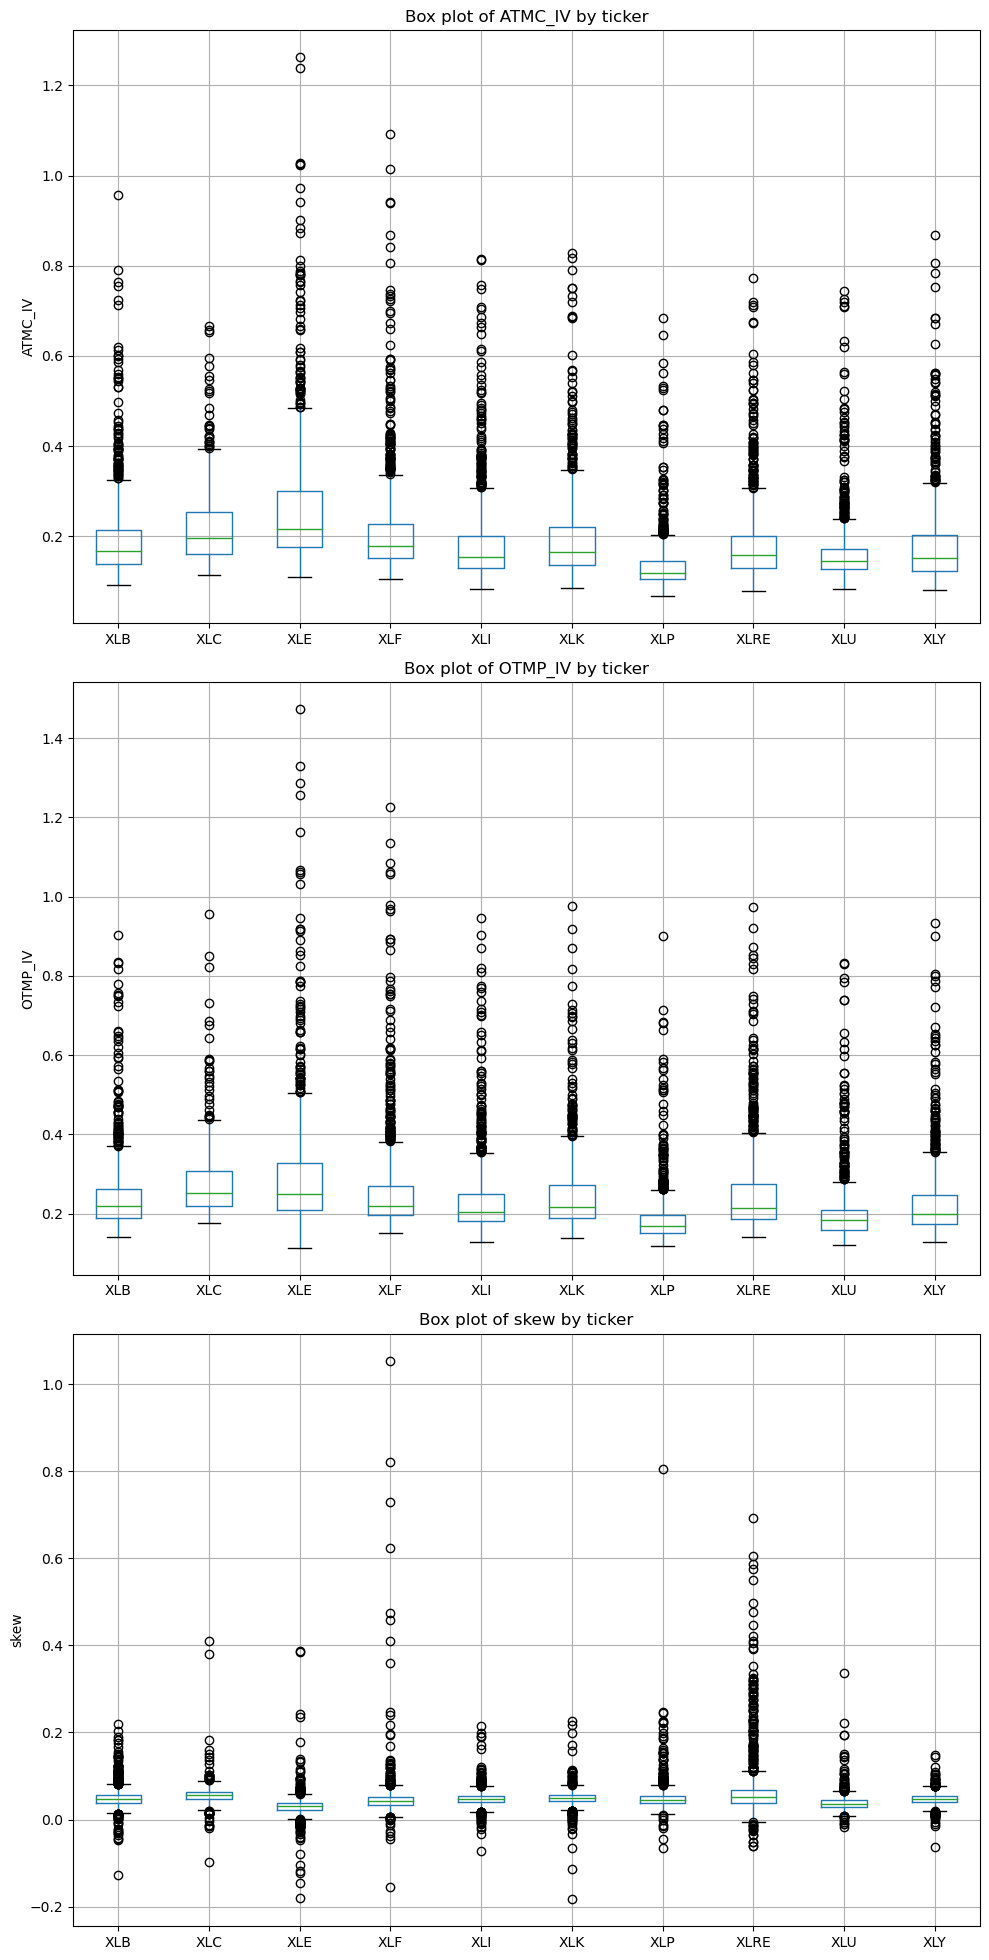

In [ ]:
# 创建一个带有3个子图的画布，每个子图都放在垂直方向上
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# 在每个子图上绘制对应的箱线图
merged.boxplot(column='ATMC_IV', by='ticker', ax=axes[0])
merged.boxplot(column='OTMP_IV', by='ticker', ax=axes[1])
merged.boxplot(column='skew', by='ticker', ax=axes[2])

# 设置每个子图的标题和副标题
axes[0].set_title('Box plot of ATMC_IV by ticker')
axes[0].set_xlabel('')
axes[0].set_ylabel('ATMC_IV')
axes[1].set_title('Box plot of OTMP_IV by ticker')
axes[1].set_xlabel('')
axes[1].set_ylabel('OTMP_IV')
axes[2].set_title('Box plot of skew by ticker')
axes[2].set_xlabel('')
axes[2].set_ylabel('skew')

# 调整子图之间的距离和边距
plt.tight_layout()

# 显示图形
plt.suptitle('')
plt.show()